In [1]:
import pandas as pd
import pickle
import numpy as np

In [2]:
data = pd.read_csv('DATA/all_results.csv',delimiter='\t')
data.head()

,Filename,Comment,F1,F2,F3,F4,F5,F6,F7,F8,...,F13,F14,F15,F16,F17,F18,F19,F20,Actual,Predicted
0,repos/libpng-code/contrib/libtests/pngvalid.c,Use the png_store returned by the exception. T...,11.25,2.45,0.05,2.03,1.25,0.05,0.05,0.41,...,0.999995,0.999999,0.905148,0.000000,0.0,0.0,2.0,0.366712,2,2
1,curl/tests/libtest/lib541.c/lib541.c,close the local file,2.15,0.05,0.05,1.67,0.05,0.05,0.05,0.41,...,0.462117,0.000000,0.000000,0.000000,0.0,0.0,2.0,-0.376548,0,2
2,repos/dealii/bundled/muparser_v2_2_4/src/muPar...,----------------------------------------------...,0.75,0.05,0.05,0.23,0.05,0.05,0.05,0.41,...,0.000000,0.000000,0.000000,0.462117,0.0,0.0,2.0,-0.464614,0,0
3,repos/server_mariadb/extra/readline/history.c,Non-zero means that we have enforced a limit o...,4.95,0.05,0.05,1.85,0.05,0.05,0.05,0.41,...,0.995055,0.761594,0.000000,0.000000,0.0,0.0,2.0,-0.104815,2,1
4,repos/server_mariadb/extra/readline/bind.c,Bind the key sequence represented by the strin...,12.65,7.25,0.05,0.59,0.05,0.05,0.05,0.41,...,0.999753,1.000000,0.999329,0.462117,0.0,0.0,2.0,0.326315,2,2


In [3]:
data_np = np.array(data)

In [4]:
for i in range(len(data_np[0])):
    print(i, data.columns[i], data_np[0][i])

0 Filename repos/libpng-code/contrib/libtests/pngvalid.c
1 Comment Use the png_store returned by the exception. This may help the compiler
       * because 'ps' is not used in this branch of the setjmp.  Note that fault
       * and ps will always be the same value.
2 F1 11.25
3 F2 2.45
4 F3 0.05
5 F4 2.03
6 F5 1.25
7 F6 0.05
8 F7 0.05
9 F8 0.41
10 F9 0.05
11 F10 0.05
12 F11 0.05
13 F12 0.9866143
14 F13 0.99999547
15 F14 0.9999985999999998
16 F15 0.90514827
17 F16 0.0
18 F17 0.0
19 F18 0.0
20 F19 2.0
21 F20 0.36671194
22 Actual 2
23 Predicted 2


In [5]:
#F18, F19 - not normalised, F12 - F17 normalized

In [6]:
for i, el in enumerate(data_np):
    for j in range(13,19):
        if data_np[i][j] == 1:
            data_np[i][j] = 20
        else:
            data_np[i][j] = np.arctanh(data_np[i][j])
data_np[0]

array(['repos/libpng-code/contrib/libtests/pngvalid.c',
       "Use the png_store returned by the exception. This may help the compiler\n       * because 'ps' is not used in this branch of the setjmp.  Note that fault\n       * and ps will always be the same value.",
       11.25, 2.45, 0.05, 2.03, 1.25, 0.05, 0.05, 0.41, 0.05, 0.05, 0.05,
       2.500000069515423, 6.49896676701307, 7.086092400897352,
       1.5000000905065525, 0.0, 0.0, 0.0, 2.0, 0.36671194, 2, 2],
      dtype=object)

In [7]:
for i in range(13,19):
    data['F'+str(i-1)] = data_np[:,i]

In [8]:
# data.to_csv('DATA/all_results_unnormalized.csv',sep='\t')

In [27]:
data_to_analyse = pd.read_csv('DATA/all_results_unnormalized_manual.csv',delimiter='\t')
data_to_analyse.head()

,F12,F13,F14,F15,F16,F17,F18,F19,Predicted
0,2.500000,6.498967,7.086092,1.5,0.0,0.0,0.0,2,2
1,0.000000,0.500000,0.000000,0.0,0.0,0.0,0.0,2,2
2,0.000000,0.000000,0.000000,0.0,0.5,0.0,0.0,2,0
3,1.000000,3.000005,1.000000,0.0,0.0,0.0,0.0,2,1
4,3.000005,4.500059,20.000000,4.0,0.5,0.0,0.0,2,2


In [10]:
# data_to_analyse = data.drop(columns=['F'+str(i) for i in range(1,12)]+['Filename','Comment','Actual'])
# data_to_analyse.columns

Index(['F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20',
       'Predicted'],
      dtype='object')

In [28]:
corr = data_to_analyse.corr(method='pearson')
corr

,F12,F13,F14,F15,F16,F17,F18,F19,Predicted
F12,1.000000,0.841233,0.799377,0.460431,0.084511,0.286827,0.169990,-0.252817,0.293426
F13,0.841233,1.000000,0.871876,0.470143,0.160085,0.270936,0.248542,-0.216667,0.355750
F14,0.799377,0.871876,1.000000,0.515227,0.126910,0.237677,0.230072,-0.188720,0.366249
F15,0.460431,0.470143,0.515227,1.000000,0.128798,0.168328,0.137567,-0.078881,0.232673
F16,0.084511,0.160085,0.126910,0.128798,1.000000,0.071515,0.298960,-0.038505,0.024136
F17,0.286827,0.270936,0.237677,0.168328,0.071515,1.000000,0.111148,-0.265309,0.093428
F18,0.169990,0.248542,0.230072,0.137567,0.298960,0.111148,1.000000,-0.026469,0.108313
F19,-0.252817,-0.216667,-0.188720,-0.078881,-0.038505,-0.265309,-0.026469,1.000000,-0.067133
Predicted,0.293426,0.355750,0.366249,0.232673,0.024136,0.093428,0.108313,-0.067133,1.000000


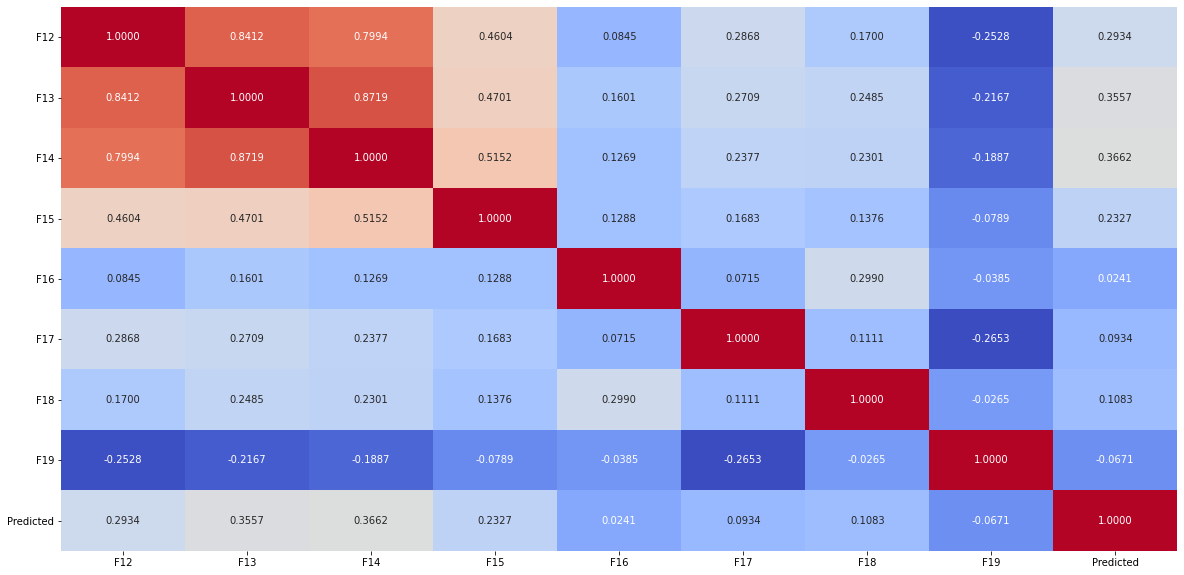

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr, annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('ANALYSIS/COMPANY_FEATS_CORR.png')